Voir : https://www.tensorflow.org/get_started/mnist/beginners

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sys
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Prediction graph

Données d'entrée

In [3]:
x = tf.placeholder(tf.float32, [None, 784])

Paramètres : W, b

In [5]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Evaluation graph

In [6]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

target labels

In [10]:
y_ = tf.placeholder(tf.float32, [None, 10])

### Loss graph

The raw formulation of cross-entropy:

`cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)), reduction_indices=[1]))`

can be numerically unstable.

So here we use `tf.nn.softmax_cross_entropy_with_logits` on the raw outputs of `y`, and then average across the batch.

(logit est ici la fonction inverse du softmax (link function) qui projette une proba sur R. Le logit est ici le resultat de la projection lineaire y = Wx + b)

In [11]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

### Graphe d'optimisation

In [12]:
optimization_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

### Training session

In [15]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

Lecture des données par batch de 100 exemples

In [22]:
for i in range(1000):
    if i%100 == 0:
        sys.stdout.write("\r%d" % i)
        sys.stdout.flush()
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(optimization_step, feed_dict={x: batch_xs, y_: batch_ys})


900

### Graphe d'évaluation

In [29]:
predict = tf.argmax(y,1)
correct = tf.argmax(y_,1)
correct_prediction = tf.equal(predict, correct)

In [24]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Exécution

In [25]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9194


Test prediction

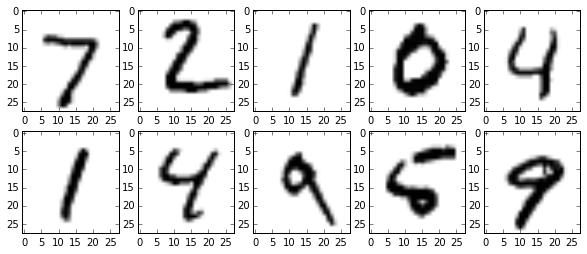

In [55]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    im = mnist.test.images[i].reshape(28,28)
    plt.imshow(im, aspect = 'auto', cmap = 'gray_r')

In [30]:
sess.run(predict, feed_dict={x: mnist.test.images[:10]})

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [33]:
sess.run(correct, feed_dict={y_: mnist.test.labels[:10]})

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

## Visualiser le graphe

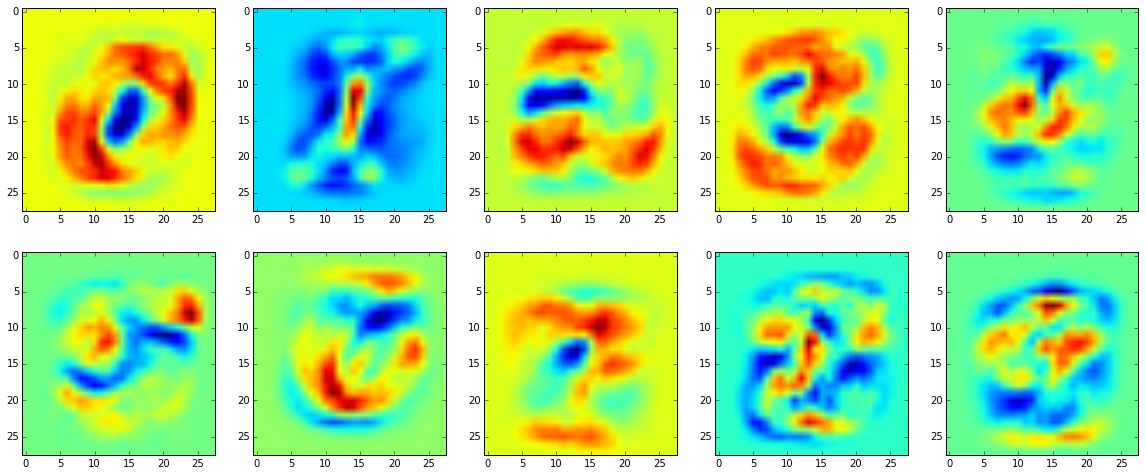

In [52]:
plt.figure(figsize=(20,8))
for  i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(sess.run(W[:,i]).reshape(28,28), aspect='auto')